Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [21]:
!pip install mediapipe

  Using cached mediapipe-0.10.18-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
  Using cached sounddevice-0.5.1-py3-none-any.whl.metadata (1.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 9.0 MB/s eta 0:00:00
Using cached mediapipe-0.10.18-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.4 MB/s eta 0:00:00
Using cached sounddevice-0.5.1-py3-none-any.whl (32 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/mt2fyrdXxzk


In [1]:
from google.colab import files

uploaded = files.upload()

Saving fist.jpg to fist.jpg


fist.jpg


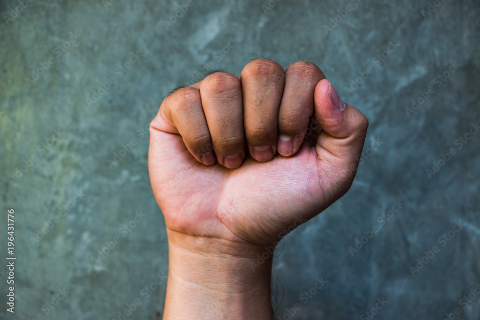

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Hands solution, we can access this module as `mp_hands = mp.solutions.hands`.

You may change the parameters, such as `static_image_mode`, `max_num_hands`, and `min_detection_confidence`, during the initialization. Run `help(mp_hands.Hands)` to get more informations about the parameters.

In [3]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.ob

Handedness of fist.jpg:
[classification {
  index: 1
  score: 0.990173042
  label: "Right"
}
]
Hand landmarks of fist.jpg:
Index finger tip coordinate: ( 395.24221420288086, 299.8952535688877)


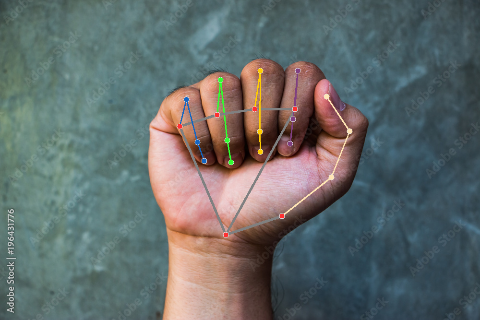

In [4]:
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))

Hand world landmarks of fist.jpg:


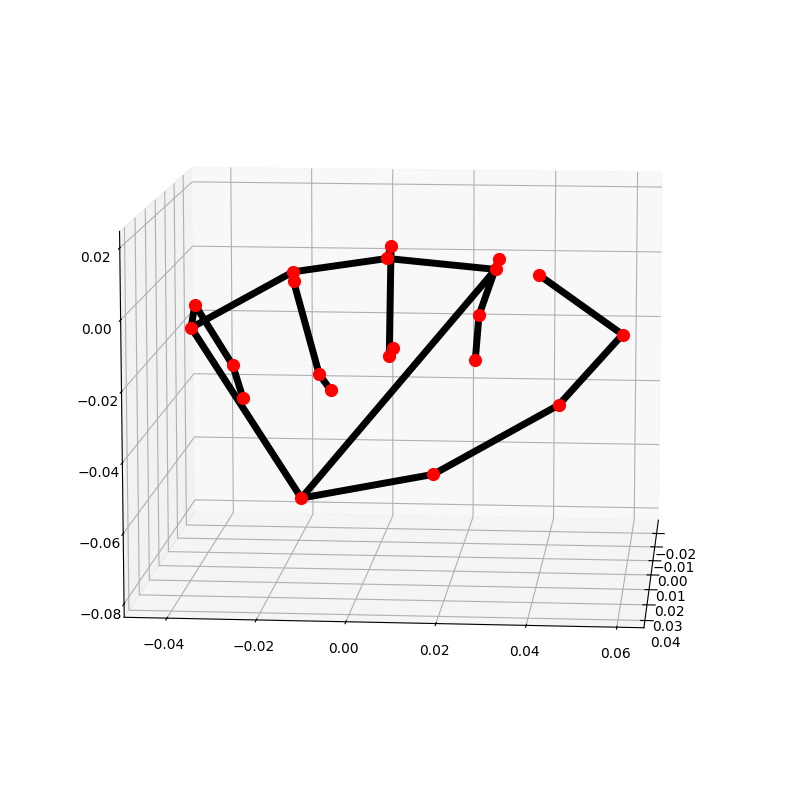

In [5]:
# Run MediaPipe Hands and plot 3d hands world landmarks.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Hands.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Draw hand world landmarks.
    print(f'Hand world landmarks of {name}:')
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [6]:
  #print(results.multi_hand_world_landmarks)
  hand_kpts = []

  for landmark in results.multi_hand_world_landmarks:
      for ct in range(21):
        cur_kpt = []
        x=landmark.landmark[ct].x  # You can replace the "0" with any number you want
        y=landmark.landmark[ct].y
        z=landmark.landmark[ct].z
        cur_kpt.append(x)
        cur_kpt.append(y)
        cur_kpt.append(z)
        hand_kpts.append(cur_kpt)

      print(hand_kpts)



[[-0.022059708833694458, 0.07693327218294144, 0.02545839734375477], [0.01285877637565136, 0.06192925572395325, 0.0077550676651299], [0.04307658597826958, 0.03897292912006378, 0.0041463035158813], [0.05861489474773407, 0.014349626377224922, -0.005824119783937931], [0.04019817337393761, -0.006044790614396334, -0.017348887398838997], [0.028021449223160744, -0.0014593512751162052, 0.004018377047032118], [0.031249571591615677, -0.011545578017830849, -0.021047305315732956], [0.027318662032485008, 0.003165977308526635, -0.025614766404032707], [0.02494872733950615, 0.020737849175930023, -0.011260829865932465], [0.0021778633818030357, -0.003931595012545586, 0.005380164831876755], [0.008233466185629368, -0.017672358080744743, -0.03122149035334587], [0.009020939469337463, 0.010420376434922218, -0.03974146768450737], [0.0059439074248075485, 0.01712978072464466, -0.012272466905415058], [-0.019080879166722298, -0.0015524274203926325, -0.0015060633886605501], [-0.012998480349779129, -0.00850955862551

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cd /content/drive/MyDrive/IITMXRSummit/Fitter3d

/content/drive/MyDrive/IITMXRSummit/Fitter3d


In [9]:
  import json
  import mediapipe as mp
  json_dict = {}
  json_dict['kpts3d'] = hand_kpts


  json_object = json.dumps(json_dict, indent=4)
  with open("kpts3d.json", "w") as outfile:
      outfile.write(json_object)

# MANO Fitting

In the following session, we will fit a mano mesh to the obtained 3d keypoints. For this purpose, we iteratively optimize mano pose and shape parameters until the 3d hand skeleton obtained from the mano mesh is similar to that obtained from mediapipe. We use chumpy library for this optimization. We start with an initial value for mano pose and shape parameters. We then compute the hand skeleton using the utilities provided by MANO library. We then compute the error between the skeleton predicted by MANO and that by mediapipe. The optimization algorithm then adjusts these parameters iteratively to minimize the loss function. We use 10 iterations. A higher iteration can improve the model accuracy

In [10]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cd /content/drive/MyDrive/IITMXRSummit/Fitter3d

/content/drive/MyDrive/IITMXRSummit/Fitter3d


In [13]:
!conda env create -f environment.yml


CondaValueError: prefix already exists: /usr/local/envs/contactpose



In [16]:
%%bash
source activate contactpose
python --version

python
import numpy as np
import json
from utilities.mano_fitting import MANOFitter

mano_fitter = MANOFitter()
kpt3d_file = '/content/drive/MyDrive/IITMXRSummit/Fitter3d/kpts3d.json'
with open(kpt3d_file, 'r') as fid:
  kps = json.loads(fid.read())

kpts = np.array(kps['kpts3d'])
#kpts = [[-0.03544877469539642, 0.05838767811655998, -0.019506869837641716], [-0.05269881337881088, 0.02871355600655079, -0.0169402826577425], [-0.05732771009206772, 0.010729782283306122, -0.010794072411954403], [-0.05348541587591171, -0.01350458711385727, 0.0003877624112647027], [-0.047213926911354065, -0.0409112423658371, 0.014551745727658272], [-0.022041533142328262, -0.014179117977619171, -0.0018857107497751713], [-0.00441540963947773, -0.033268608152866364, 0.006258154287934303], [0.005797967314720154, -0.04809428006410599, 0.00687802629545331], [0.015201980248093605, -0.06252098828554153, -0.003307641251012683], [-0.0014467659639194608, -0.004142025485634804, 0.0030418268870562315], [-0.002272455021739006, -0.01221868209540844, 0.01504564005881548], [-0.015911687165498734, -0.007884243503212929, 0.020803213119506836], [-0.016050802543759346, -0.005657467991113663, 0.026599545031785965], [0.01551774051040411, 0.00701332651078701, 0.0015511132078245282], [0.004906638525426388, 0.004851341247558594, 0.021326866000890732], [-0.007450616918504238, 0.008627749979496002, 0.02997765503823757], [-0.007324473932385445, 0.015114480629563332, 0.03431728482246399], [0.018617769703269005, 0.02408120222389698, 0.0018812274793162942], [0.010446031577885151, 0.022009996697306633, 0.017945900559425354], [0.00041747093200683594, 0.02361103892326355, 0.030600126832723618], [-0.00156492181122303, 0.030142920091748238, 0.032304324209690094]]
#kpts = np.array(kpts)

mano_params = mano_fitter.fit_joints((kpts, kpts))
print(mano_params)

json_dict = {}
json_dict['mano_pose_l'] = mano_params[0]['pose']  #0 for left, 1 for right
json_dict['mano_betas_l'] = mano_params[0]['betas']
json_dict['mano_pose_r'] = mano_params[1]['pose']  #0 for left, 1 for right
json_dict['mano_betas_r'] = mano_params[1]['betas']

json_object = json.dumps(json_dict, indent=4)
with open("mano_params.json", "w") as outfile:
    outfile.write(json_object)

Python 3.7.16
Rigid registration RMSE (before) = 0.067468
Rigid registration RMSE (after) = 0.012247
Rigid registration RMSE (before) = 0.078337
Rigid registration RMSE (after) = 0.005330
[{'pose': [0.2254930713306648, 0.10445013786123768, 0.0025775066261506697, 0.4308216972453873, 4.193647571792167, -2.2996403602840867, -2.6542928597055577, 1.892798529292445, 4.832105076020589, -1.7507511418503827, -2.2058552983610746, 5.621862059546504, 2.0136269306653047, 4.8101753849509254, 10.280392922702848, -13.524086689734142, 8.740874951647024, -8.520130465957966], 'betas': [0.0018558812684513067, -0.0038276418015017405, 0.0003878125772943648, 0.002537516536643252, -0.0006538797017348796, 0.00039891809051578514, 0.001776375388035795, 0.0005889255709197827, 0.003426662741946468, -0.0003236521152748085], 'valid': True, 'mTc': {'translation': [-0.012472941729782961, -0.000977953840337531, -0.010554513563751282], 'rotation': [0.6322190594858158, 0.4783938656397361, -0.4550960179056249, 0.405371415

7.92e-02
1.60e-02
4.55e-03
4.09e-03
3.83e-03
3.83e-03
3.80e-03
3.80e-03
3.79e-03
3.79e-03
3.79e-03
3.78e-03
3.78e-03
3.78e-03
3.78e-03
3.78e-03
3.78e-03
3.78e-03
3.78e-03
3.78e-03
3.78e-03
2.36e-02
4.58e-03
8.73e-04
6.01e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
5.99e-04
